<a href="https://colab.research.google.com/github/mmouadd/Bachelorarbeit/blob/main/1%20Datenverst%C3%A4ndnis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importieren von Bibliotheken für Datenanalyse und Visualisierung
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Für die Arbeit mit Daten und Zeiten
from datetime import datetime

# Um Warnungen zu ignorieren, die die Ausgabe überladen könnten
import warnings
warnings.filterwarnings("ignore")

# Festlegen von Größe und Stil für Seaborn-Plots
sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

# Konfigurieren von Pandas-Anzeigeoptionen
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

In [ ]:
# URL der CSV-Datei, die den Datensatz enthält
Dataset = 'https://raw.githubusercontent.com/mmouadd/Bachelorarbeit/main/Datensatz/marketing_campaign.csv'

# Laden des Datensatzes in ein DataFrame
df = pd.read_csv(Dataset, sep=",")

# Anzeige der ersten Zeilen des DataFrame
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04/09/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08/03/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21/08/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10/02/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19/01/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Anzeigen der Spaltennamen im DataFrame
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
def display_dataset_statistics_as_dataframe(df):
    # Basisstatistiken berechnen
    anzahl_vars = df.shape[1] # Anzahl der Spalten
    anzahl_obs = df.shape[0] # Anzahl der Zeilen
    fehlende_zellen = df.isnull().sum().sum() # Gesamtanzahl fehlender Werte
    gesamt_zellen = anzahl_vars * anzahl_obs # Gesamtanzahl der Zellen
    fehlende_zellen_prozent = (fehlende_zellen / gesamt_zellen) * 100 # Prozentualer Anteil fehlender Werte
    doppelte_zeilen = df.duplicated().sum() # Anzahl doppelter Zeilen
    doppelte_zeilen_prozent = (doppelte_zeilen / anzahl_obs) * 100  # Prozentualer Anteil doppelter Zeilen

    # Die Metriken und ihre Werte definieren
    metriken = ['Anzahl der Variablen', 'Anzahl der Beobachtungen', 'Fehlende Zellen', 'Fehlende Zellen (%)', 'Doppelte Zeilen', 'Doppelte Zeilen (%)']
    werte = [anzahl_vars, anzahl_obs, fehlende_zellen, f"{fehlende_zellen_prozent:.2f}%", doppelte_zeilen, f"{doppelte_zeilen_prozent:.2f}%"]

    # Ein DataFrame mit pandas erstellen
    daten = pd.DataFrame(werte, index=metriken, columns=['Statistik'])
    return daten

# Funktion aufrufen und die Tabelle anzeigen
statistik_tabelle = display_dataset_statistics_as_dataframe(df)
display(statistik_tabelle)

,Statistik
Anzahl der Variablen,29
Anzahl der Beobachtungen,2240
Fehlende Zellen,24
Fehlende Zellen (%),0.04%
Doppelte Zeilen,0
Doppelte Zeilen (%),0.00%


In [ ]:
# Zusammenfassung des DataFrames anzeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
def classify_variable_type(series):
    # Klassifizierung der Variablentypen basierend auf ihren Werten und Datentypen
    unique_vals = series.nunique()

    if series.dtype == 'bool' or set(series.unique()) == {0, 1}:
        return 'Boolesch'
    elif series.dtype in ['int64', 'float64'] and unique_vals > 10:
        return 'Numerisch'
    else:
        return 'Kategorisch'

def display_variable_types(df):
    # Anwendung der Klassifizierung auf jede Spalte
    types_classification = df.apply(classify_variable_type)

    # Zählung der verschiedenen Variablentypen
    types_counts = types_classification.value_counts()

    # Tabelle mit Anzahl der Variablentypen erstellen
    table_df = pd.DataFrame(types_counts).reset_index()
    table_df.columns = ["Variablentyp", "Anzahl"]

    # Die Tabelle anzeigen
    return table_df.style.hide_index()

# Ausführung der Funktion und Anzeige der Ergebnistabelle
display_variable_types(df)

Variablentyp,Anzahl
Numerisch,15
Kategorisch,7
Boolesch,7


In [ ]:
def classify_variable_type(series):
    # Bestimmt den Typ einer Serie (Spalte) als boolesch, numerisch oder kategorisch
    unique_vals = series.nunique()

    if series.dtype == 'bool' or set(series.unique()) == {0, 1}:
        return 'Boolesch'
    elif series.dtype in ['int64', 'float64'] and unique_vals > 10:
        return 'Numerisch'
    else:
        return 'Kategorisch'

def display_variable_names_by_type(df):
    # Anwendung der Klassifizierungsfunktion auf jede Spalte und Gruppierung nach Typ
    types_classification = df.apply(classify_variable_type)

    # Extrahiere Spaltennamen für jeden Typ
    boolesch_cols = types_classification[types_classification == 'Boolesch'].index.tolist()
    numerisch_cols = types_classification[types_classification == 'Numerisch'].index.tolist()
    kategorisch_cols = types_classification[types_classification == 'Kategorisch'].index.tolist()
    print("Boolesche Variablen:", boolesch_cols)
    print("\nNumerische Variablen:", numerisch_cols)
    print("\nKategorische Variablen:", kategorisch_cols)

# Ausführung der Funktion und Anzeige der Spaltennamen nach Typ
display_variable_names_by_type(df)

Boolesche Variablen: ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

Numerische Variablen: ['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

Kategorische Variablen: ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']


In [ ]:
# Datentypen der Spalten anzeigen
for column, dtype in df.dtypes.items():
    print(f"{column}: {dtype}")

# Anzahl der eindeutigen Datentypen
print("\nAnzahl der Datentypen:")
print(df.dtypes.value_counts().to_string())

ID: int64
Year_Birth: int64
Education: object
Marital_Status: object
Income: float64
Kidhome: int64
Teenhome: int64
Dt_Customer: object
Recency: int64
MntWines: int64
MntFruits: int64
MntMeatProducts: int64
MntFishProducts: int64
MntSweetProducts: int64
MntGoldProds: int64
NumDealsPurchases: int64
NumWebPurchases: int64
NumCatalogPurchases: int64
NumStorePurchases: int64
NumWebVisitsMonth: int64
AcceptedCmp3: int64
AcceptedCmp4: int64
AcceptedCmp5: int64
AcceptedCmp1: int64
AcceptedCmp2: int64
Complain: int64
Z_CostContact: int64
Z_Revenue: int64
Response: int64

Anzahl der Datentypen:
int64      25
object      3
float64     1


In [ ]:
# Konvertierung der 'Dt_Customer'-Spalte in ein Datumsformat
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
# Statistische Zusammenfassung der demografischen Daten, Familienstruktur und Kundenbindung im Kundenverhaltens-Datensatz
description = df[["Dt_Customer", "Year_Birth", "Income", "Kidhome", "Teenhome", "Recency"]].describe(datetime_is_numeric=True).fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

# Formatierung der numerischen Werte auf drei Dezimalstellen
for col in description.columns:
    if description[col].dtype == 'float64':
        description[col] = description[col].apply(lambda x: format(x, '.3f') if isinstance(x, float) and not x.is_integer() else int(x))

# Entfernen überflüssiger Nullen in der Ausgabe
description = description.replace(r'\.000$', '', regex=True)
description

,Dt_Customer,Year_Birth,Income,Kidhome,Teenhome,Recency
count,2240,2240,2216,2240,2240,2240
mean,2013-07-11 22:57:38.571428608,1968.806,52247.251,0.444,0.506,49.109
std,-,11.984,25173.077,0.538,0.545,28.962
min,2012-01-08 00:00:00,1893,1730,0,0,0
25%,2013-01-19 18:00:00,1959,35303,0,0,24
50%,2013-07-11 00:00:00,1970,51381.500,0,0,49
75%,2013-12-30 06:00:00,1977,68522,1,1,74
max,2014-12-06 00:00:00,1996,666666,2,2,99


In [ ]:
# Extraktion deskriptiver Statistiken für bestimmte Produktkategorien
description = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].describe()

# Formatierung der numerischen Werte auf drei Dezimalstellen
for col in description.columns:
    if description[col].dtype == 'float64':
        description[col] = description[col].apply(lambda x: format(x, '.3f') if isinstance(x, float) and not x.is_integer() else int(x))

# Entfernen überflüssiger Nullen in der Ausgabe
description = description.replace(r'\.000$', '', regex=True)
description

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240,2240,2240,2240,2240,2240
mean,303.936,26.302,166.950,37.525,27.063,44.022
std,336.597,39.773,225.715,54.629,41.280,52.167
min,0,0,0,0,0,0
25%,23.750,1,16,3,1,9
50%,173.500,8,67,12,8,24
75%,504.250,33,232,50,33,56
max,1493,199,1725,259,263,362


In [ ]:
# Extraktion deskriptiver Statistiken der Kaufgewohnheiten über verschiedene Kanäle und Online-Interaktionen der Kunden
description = df[["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Z_CostContact", "Z_Revenue"]].describe()

# Formatierung der numerischen Werte auf drei Dezimalstellen
for col in description.columns:
    if description[col].dtype == 'float64':
        description[col] = description[col].apply(lambda x: format(x, '.3f') if isinstance(x, float) and not x.is_integer() else int(x))

# Entfernen überflüssiger Nullen in der Ausgabe
description = description.replace(r'\.000$', '', regex=True)
description

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240,2240,2240,2240,2240,2240,2240
mean,2.325,4.085,2.662,5.790,5.317,3,11
std,1.932,2.779,2.923,3.251,2.427,0,0
min,0,0,0,0,0,3,11
25%,1,2,0,3,3,3,11
50%,2,4,2,5,6,3,11
75%,3,6,4,8,7,3,11
max,15,27,28,13,20,3,11


In [ ]:
# Definition der kategorialen Spalten
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1',
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain', 'Response']

# Definition der numerischen Spalten
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

# Definition der Spalte mit Zeitstempeln
timestamp = ["Dt_Customer"]

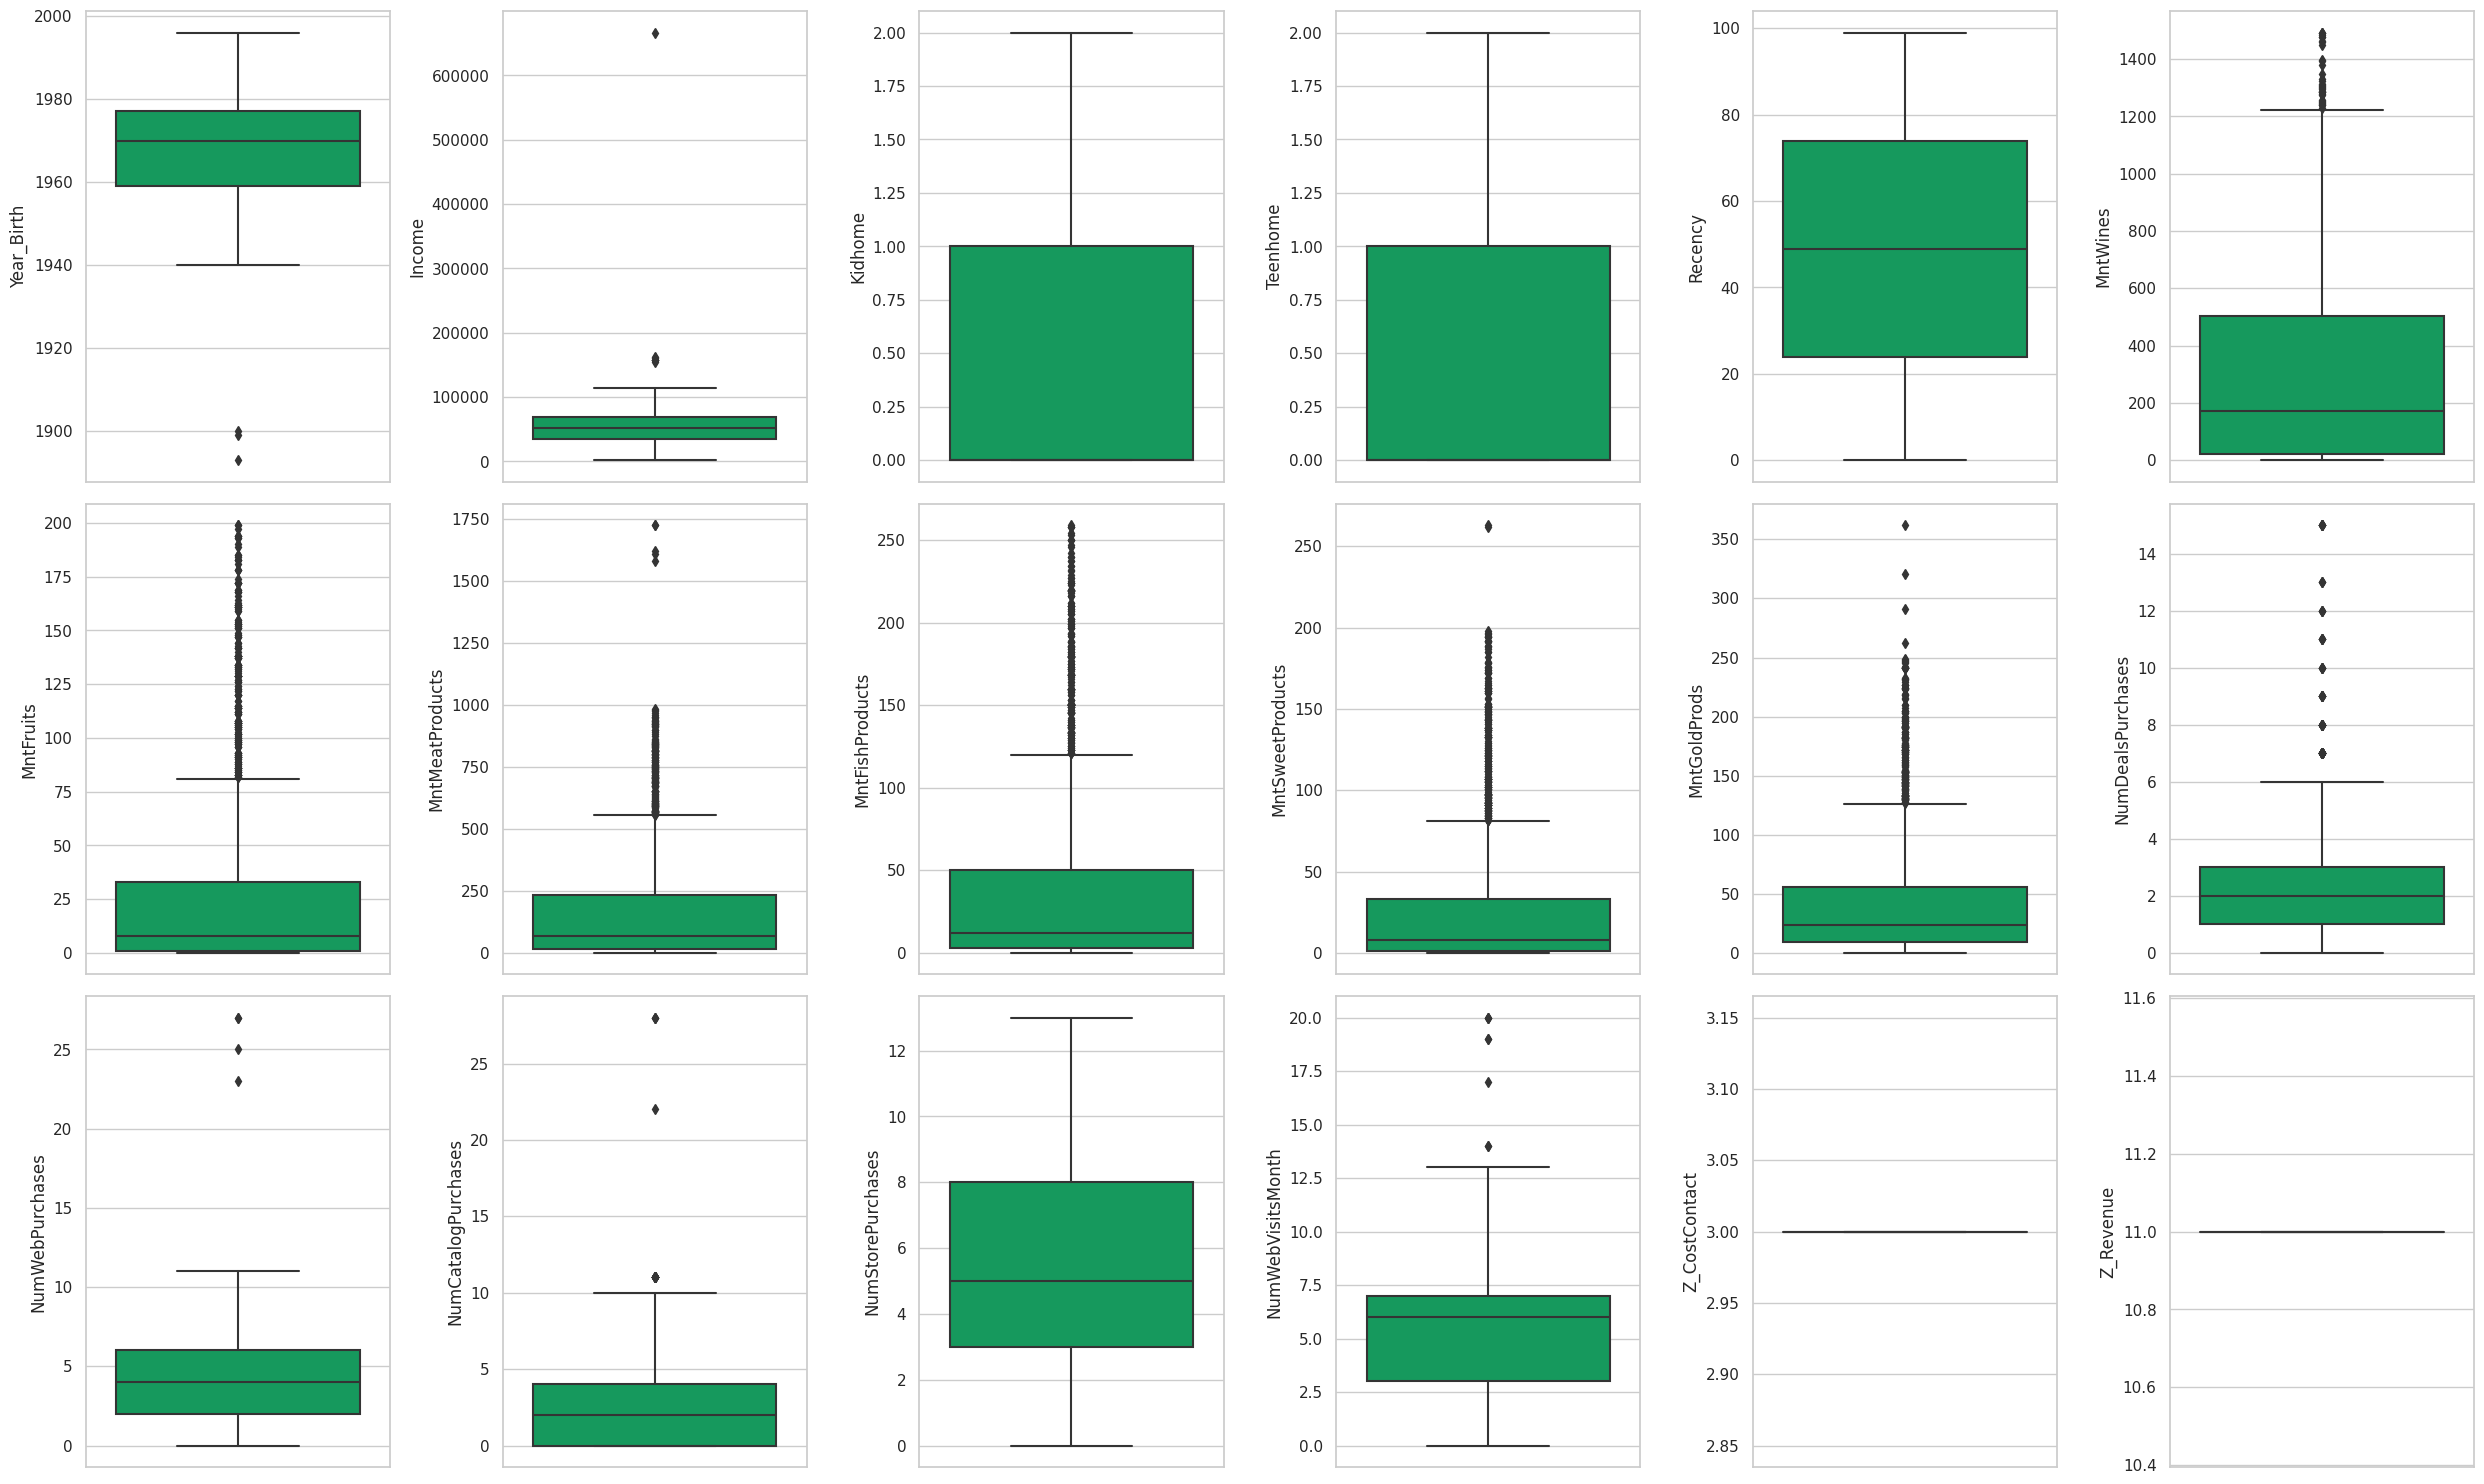

In [ ]:
# Erstellen einer großen Abbildung für die Boxplots
plt.figure(figsize=(25, 15))

# Anzahl der Zeilen im Rasterlayout für Boxplots
n = 3

# Erstellen eines Boxplots für jede numerische Spalte
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.boxplot(y=df[num_cols[i]], color='#00af5f', orient='v')
    plt.tight_layout()

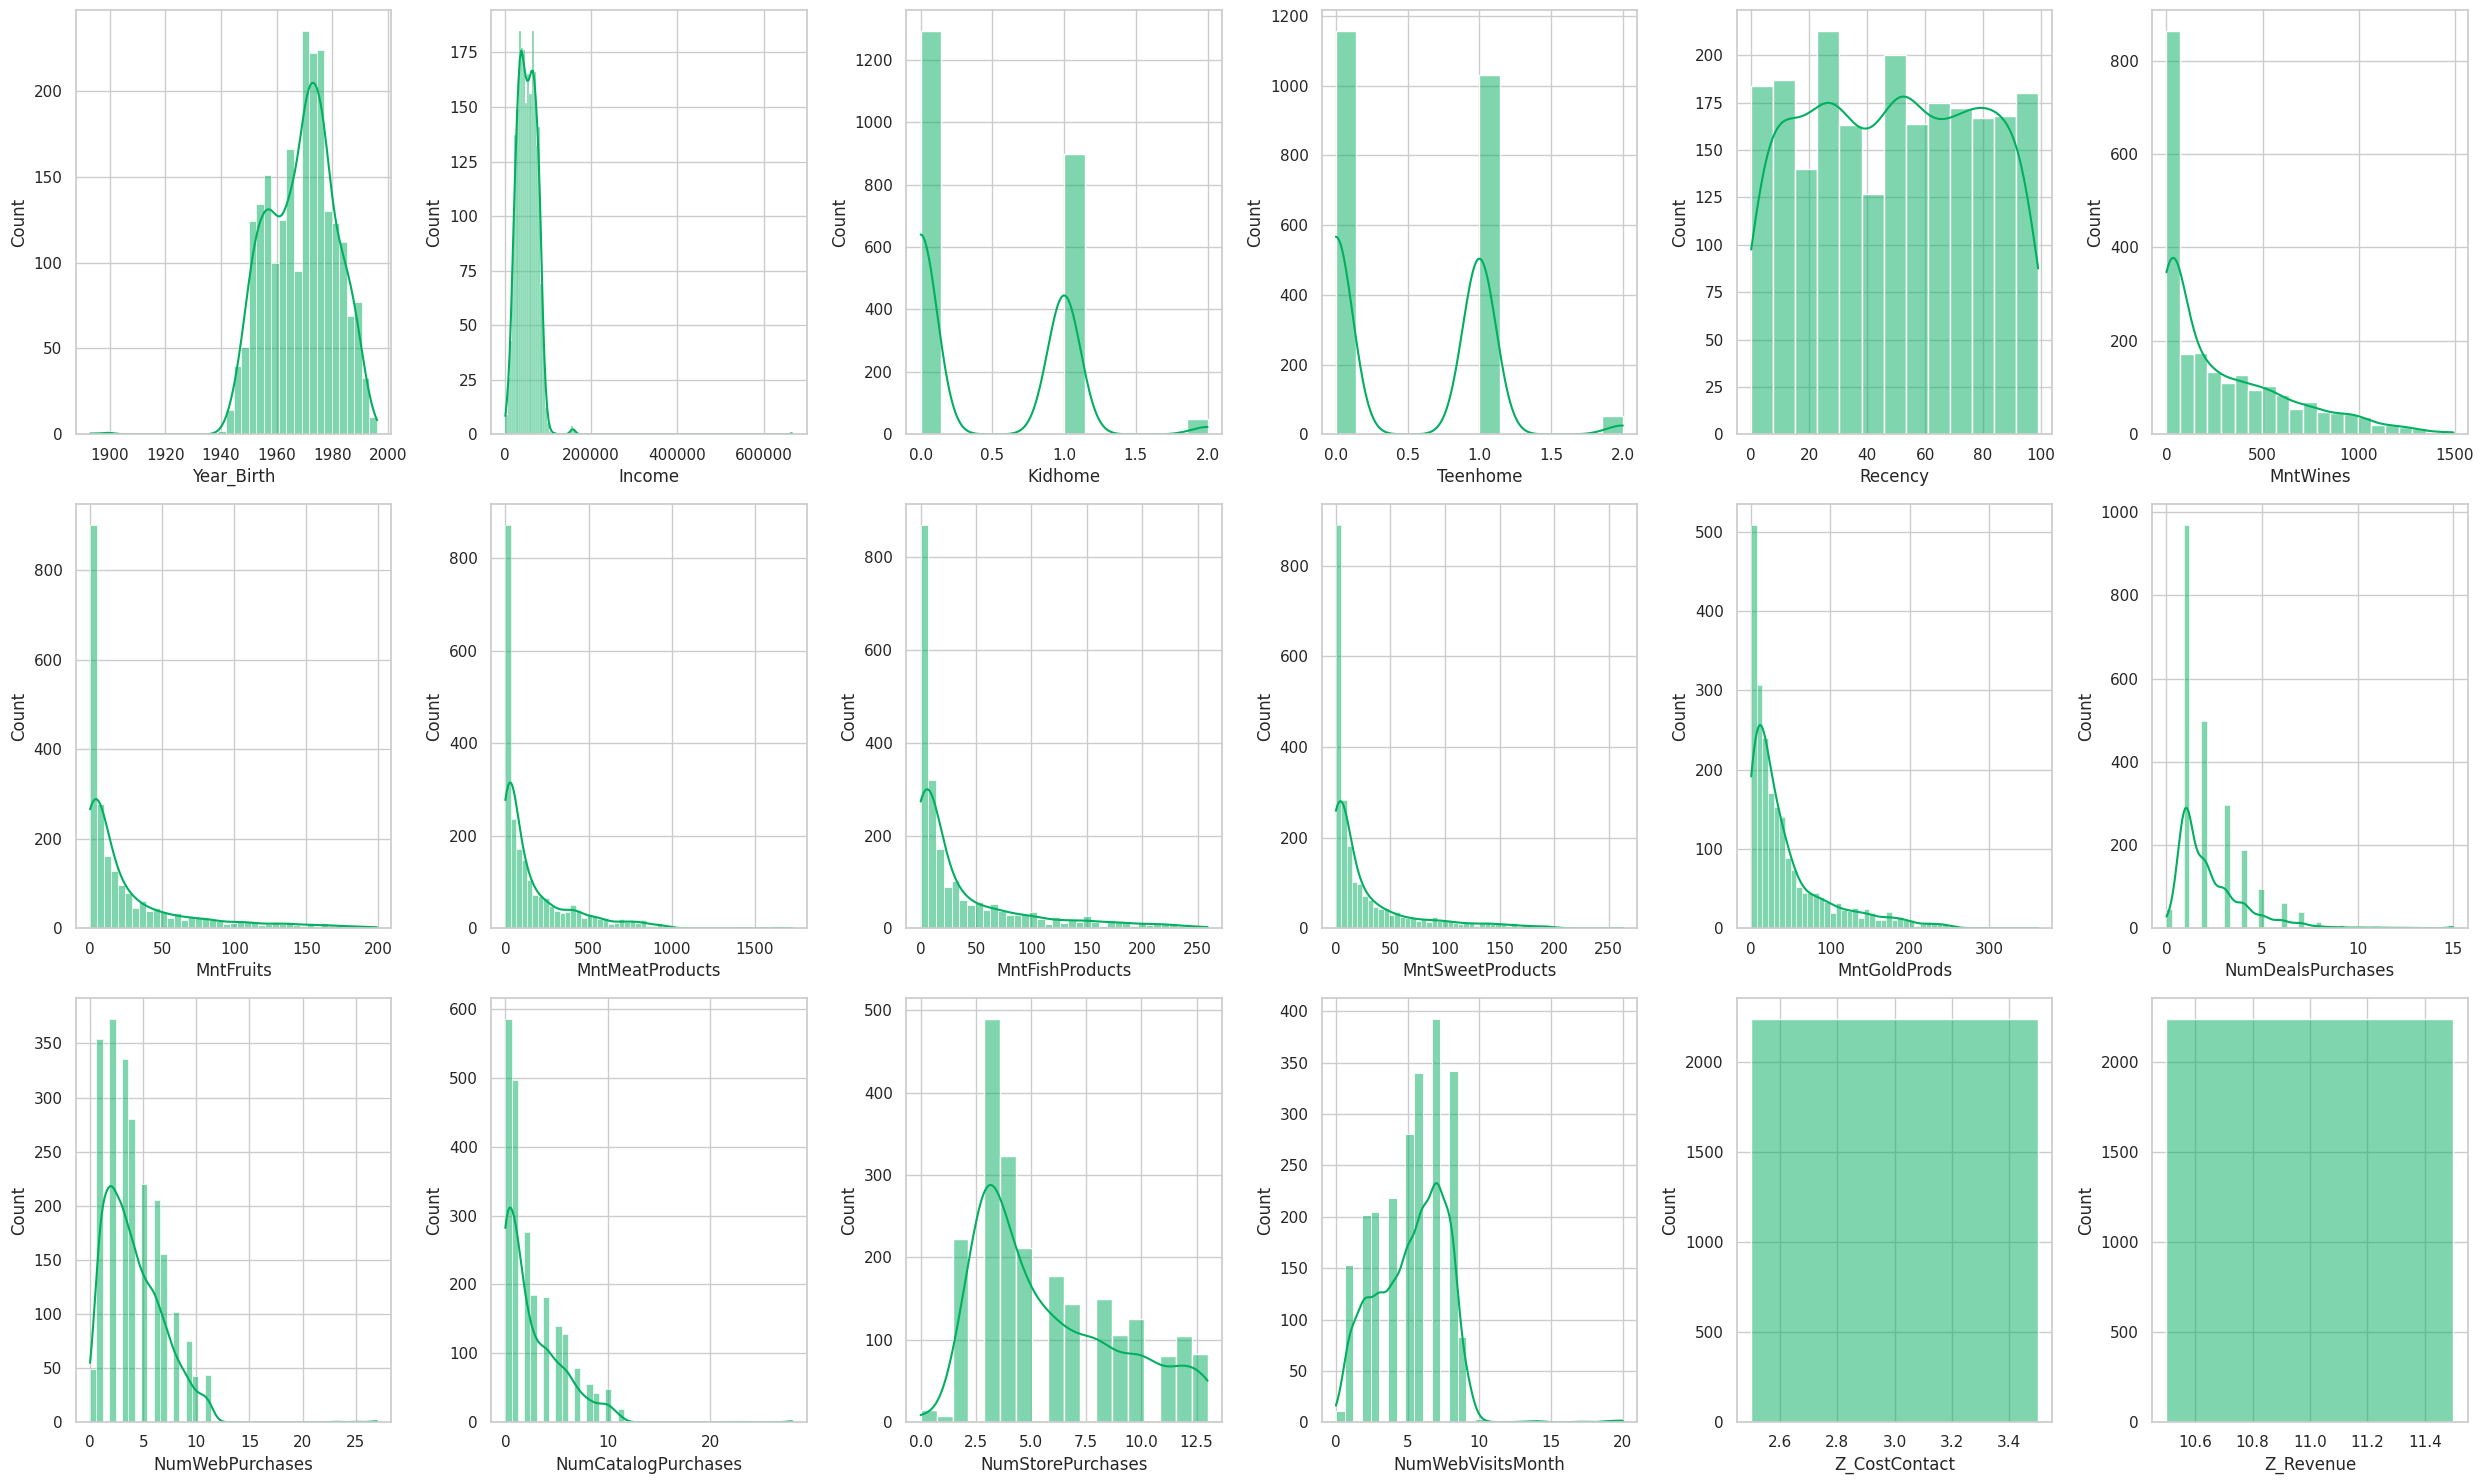

In [ ]:
# Festlegen der Größe des Gesamtbildes für die Histogramme
plt.figure(figsize=(25, 15))

# Festlegen der Anzahl der Zeilen für die Subplots
n = 3

# Erstellen eines Histogramms für jede numerische Spalte
for i in range(0, len(num_cols)):
    plt.subplot(n, math.ceil(len(num_cols)/n), i+1)
    sns.histplot(df[num_cols[i]], color='#00af5f', kde=True)
    plt.tight_layout()

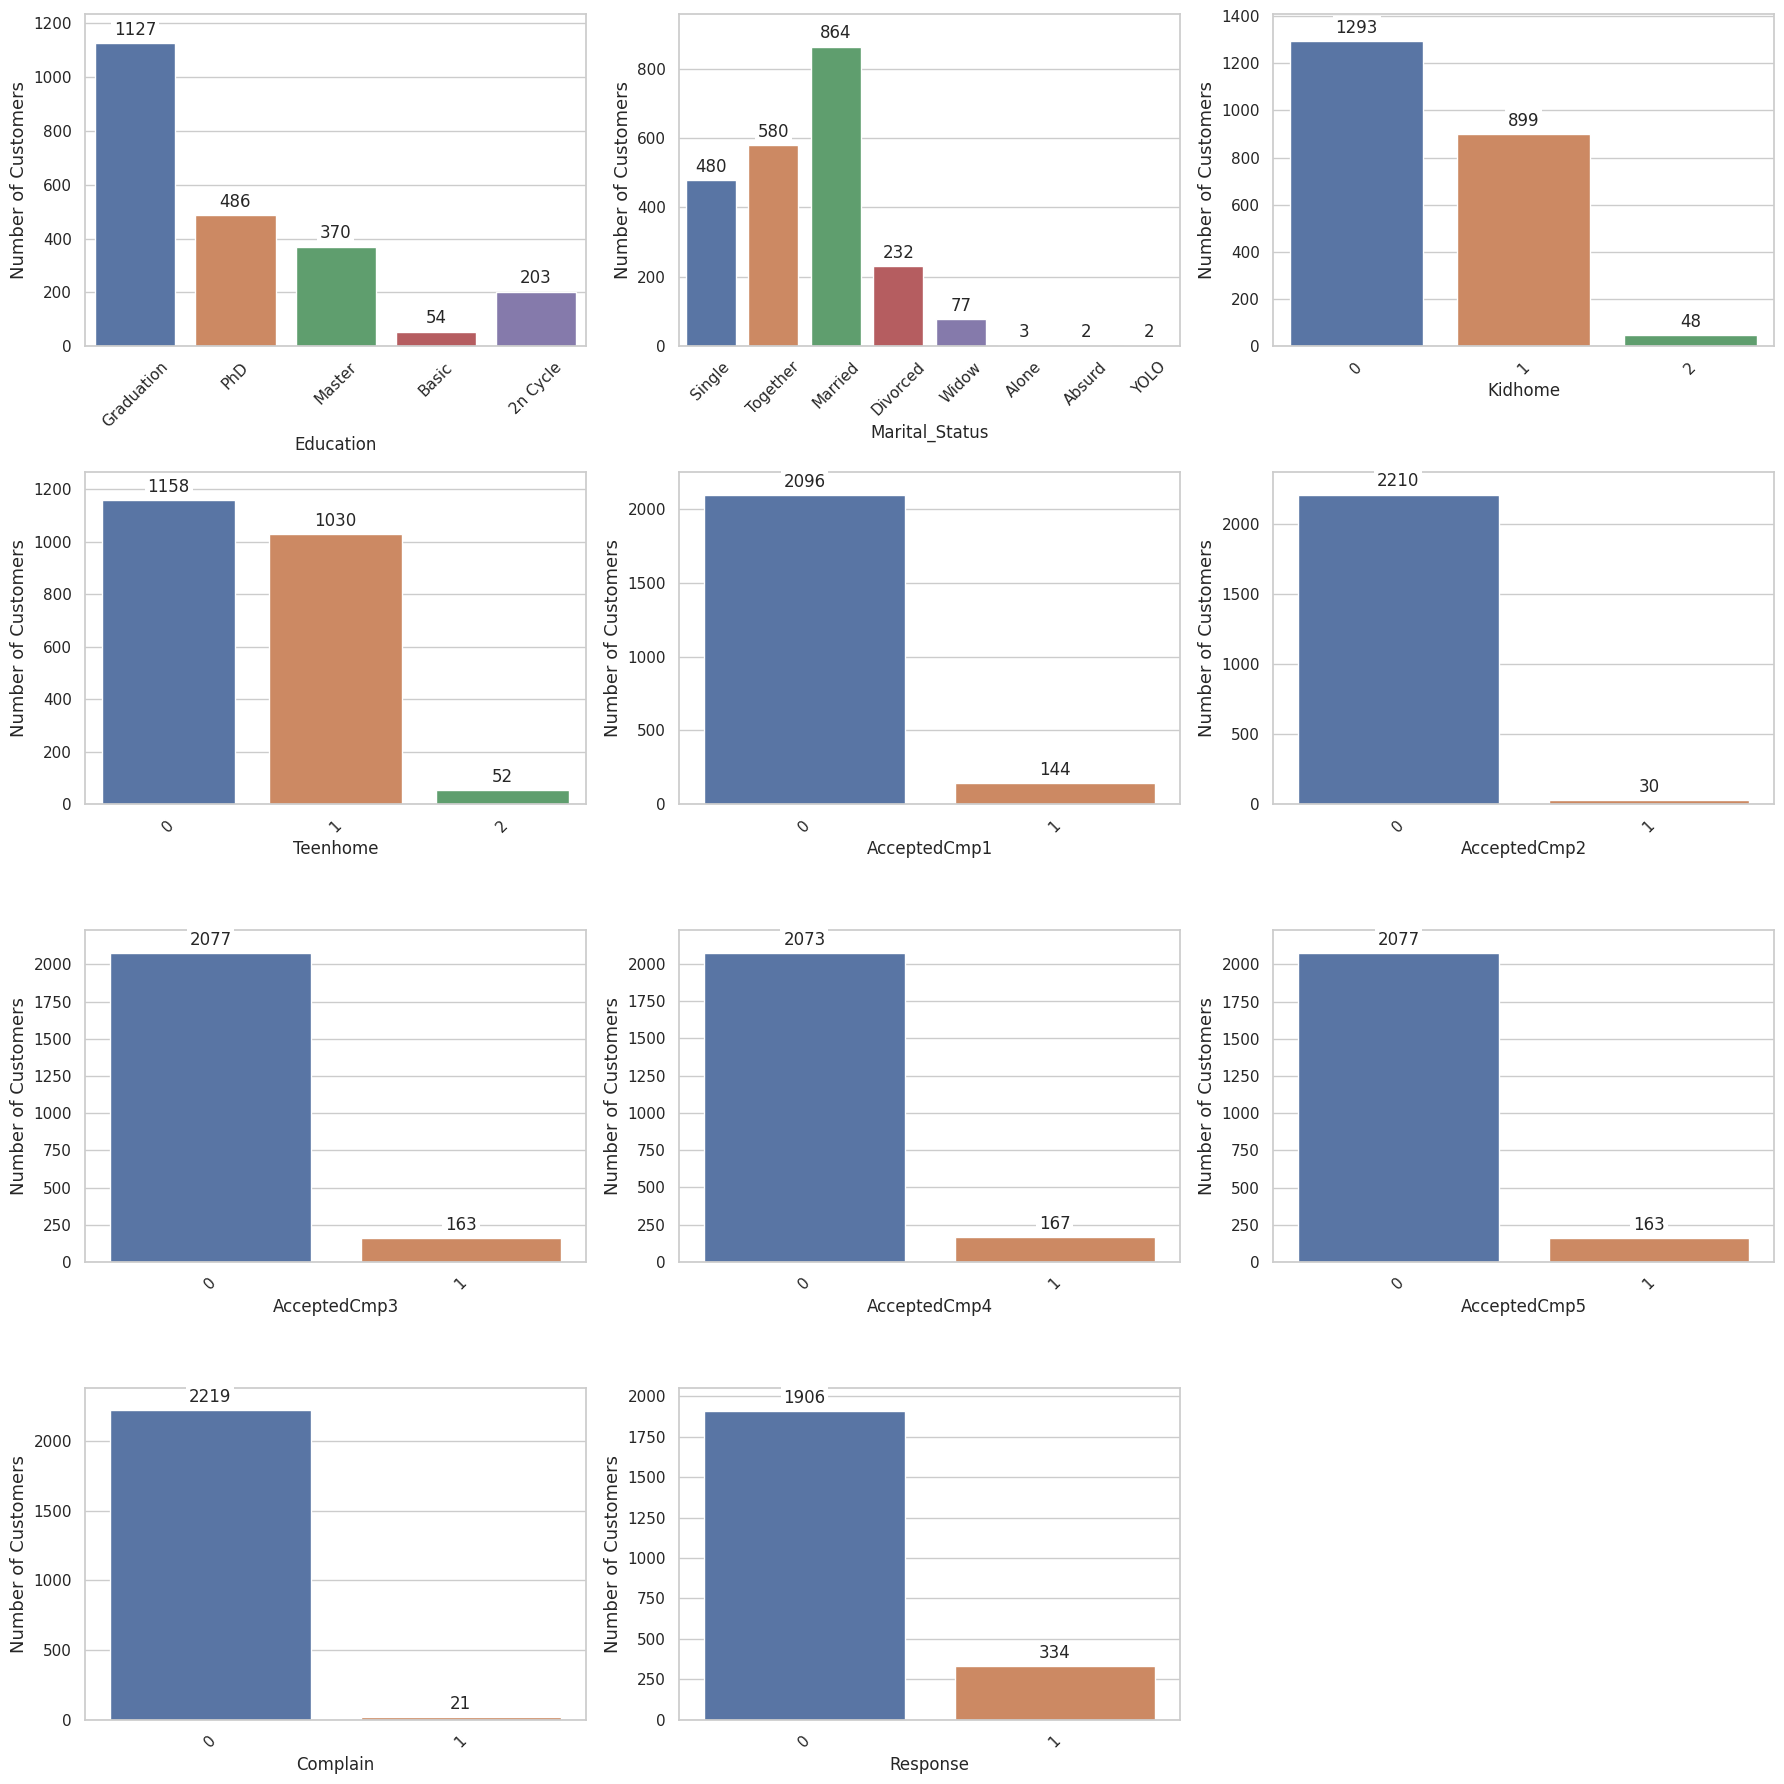

In [ ]:
# Erstellen einer Kopie der kategorialen Spalten und Hinzufügen/Entfernen bestimmter Merkmale
cat = cat_cols.copy()
cat.insert(1, "Year_Birth")
cat.insert(4, "Kidhome")
cat.insert(5, "Teenhome")
cat.remove("ID")
cat.remove("Year_Birth")

# Festlegen der Anzahl der Zeilen für die Subplots
n = 4

# Erstellen einer Abbildung für die Balkendiagramme
fig = plt.figure(figsize=(18, 18))

# Erstellen eines Balkendiagramms für jede ausgewählte kategoriale Variable
for i in range(0, len(cat)):
    fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=df[cat[i]], orient='h')
    for patch in bar.patches:
        bar.annotate(int(patch.get_height()),
                xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                bbox=dict(facecolor='white', edgecolor="None", pad=2))

    # Anpassung der Farbpalette und Achsen
    sns.color_palette("YlOrBr")
    plt.xticks(rotation=45)
    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()

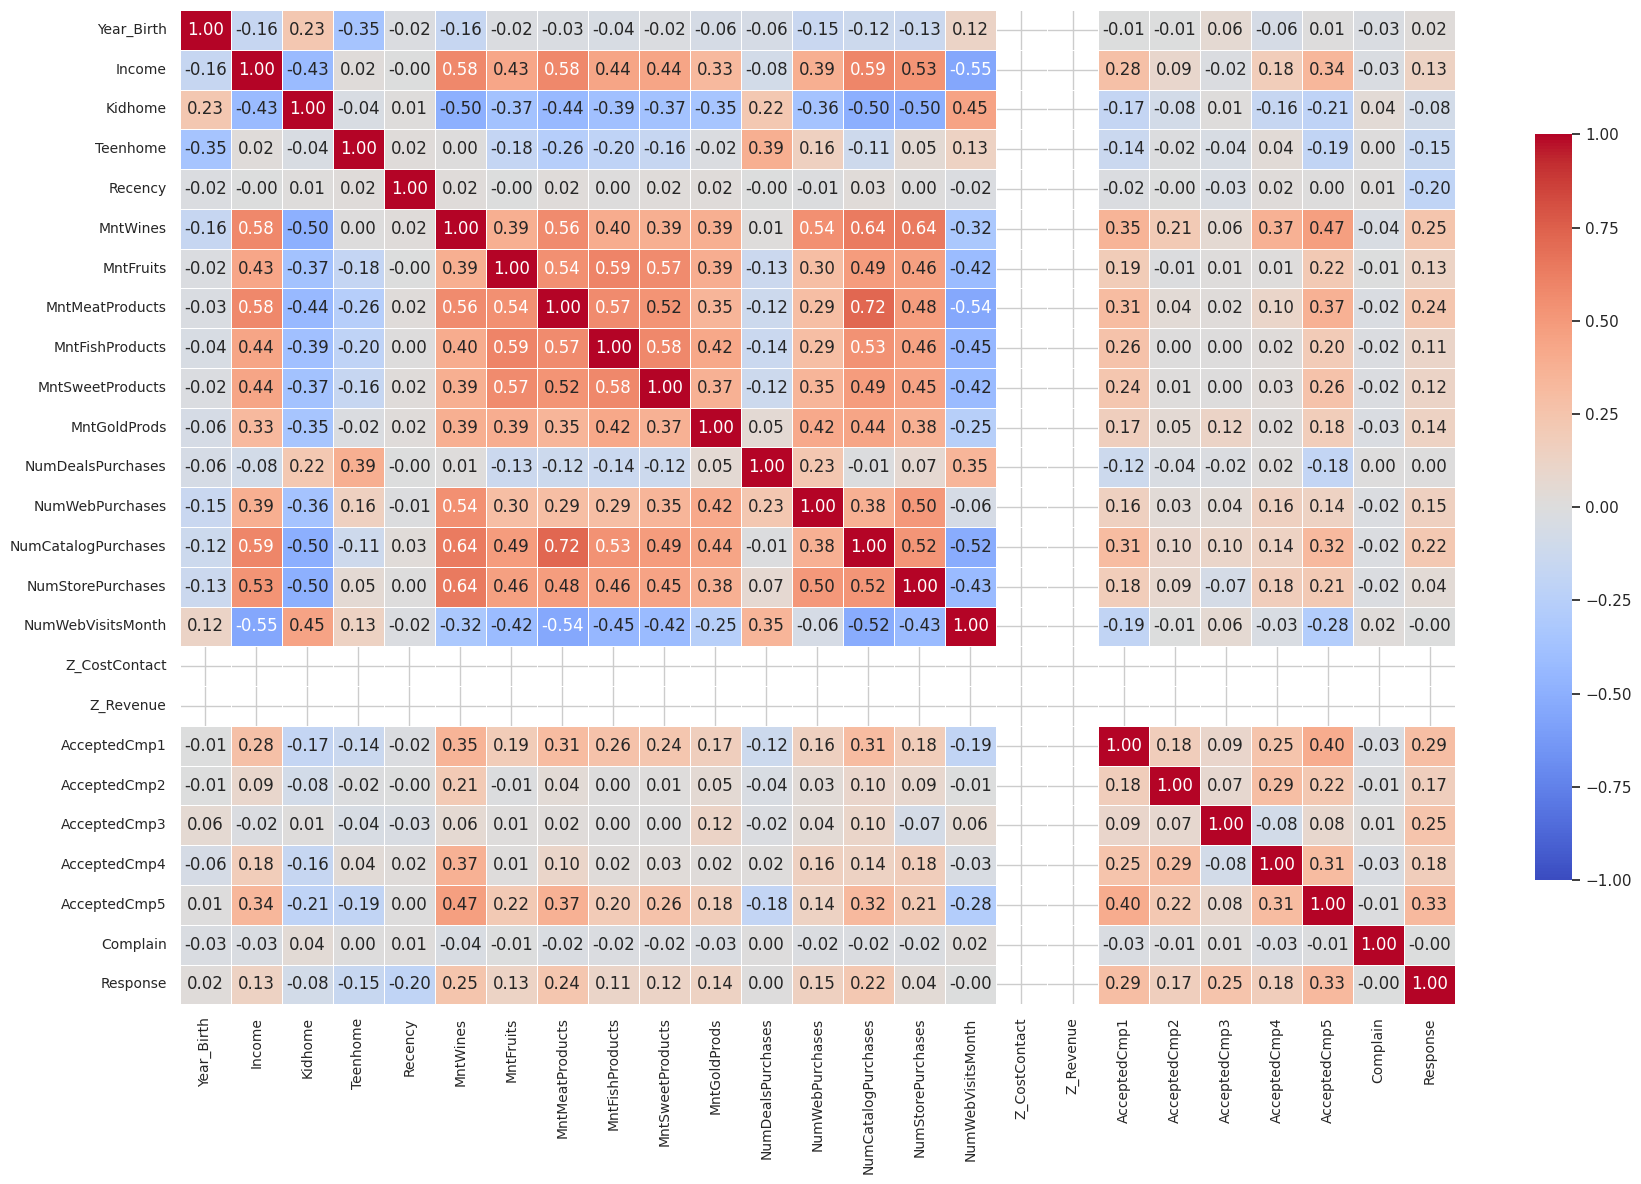

In [ ]:
# Daten vorbereiten
cat = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']].astype("int64")
dfhm = pd.concat([df[num_cols], cat], axis=1)

# Einstellung der Grafikgröße
plt.figure(figsize=(18,12))

# Heatmap erstellen
sns.heatmap(dfhm.corr(),
            cmap='coolwarm', # Farbschema
            vmax=1, vmin=-1, # Skalierung der Korrelationswerte
            annot=True, # Anzeigen der Korrelationswerte
            fmt='.2f', # Formatierung der Anzeigewerte
            linewidths=0.5, # Breite der Linien zwischen den Zellen
            linecolor='white', # Farbe der Linien zwischen den Zellen
            cbar_kws={"shrink": 0.75}) # Anpassung der Farbleiste

# Anpassung der Schriftgröße der Achsenbeschriftungen
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Optimierung des Layouts
plt.tight_layout()

# Anzeigen der Heatmap
plt.show()

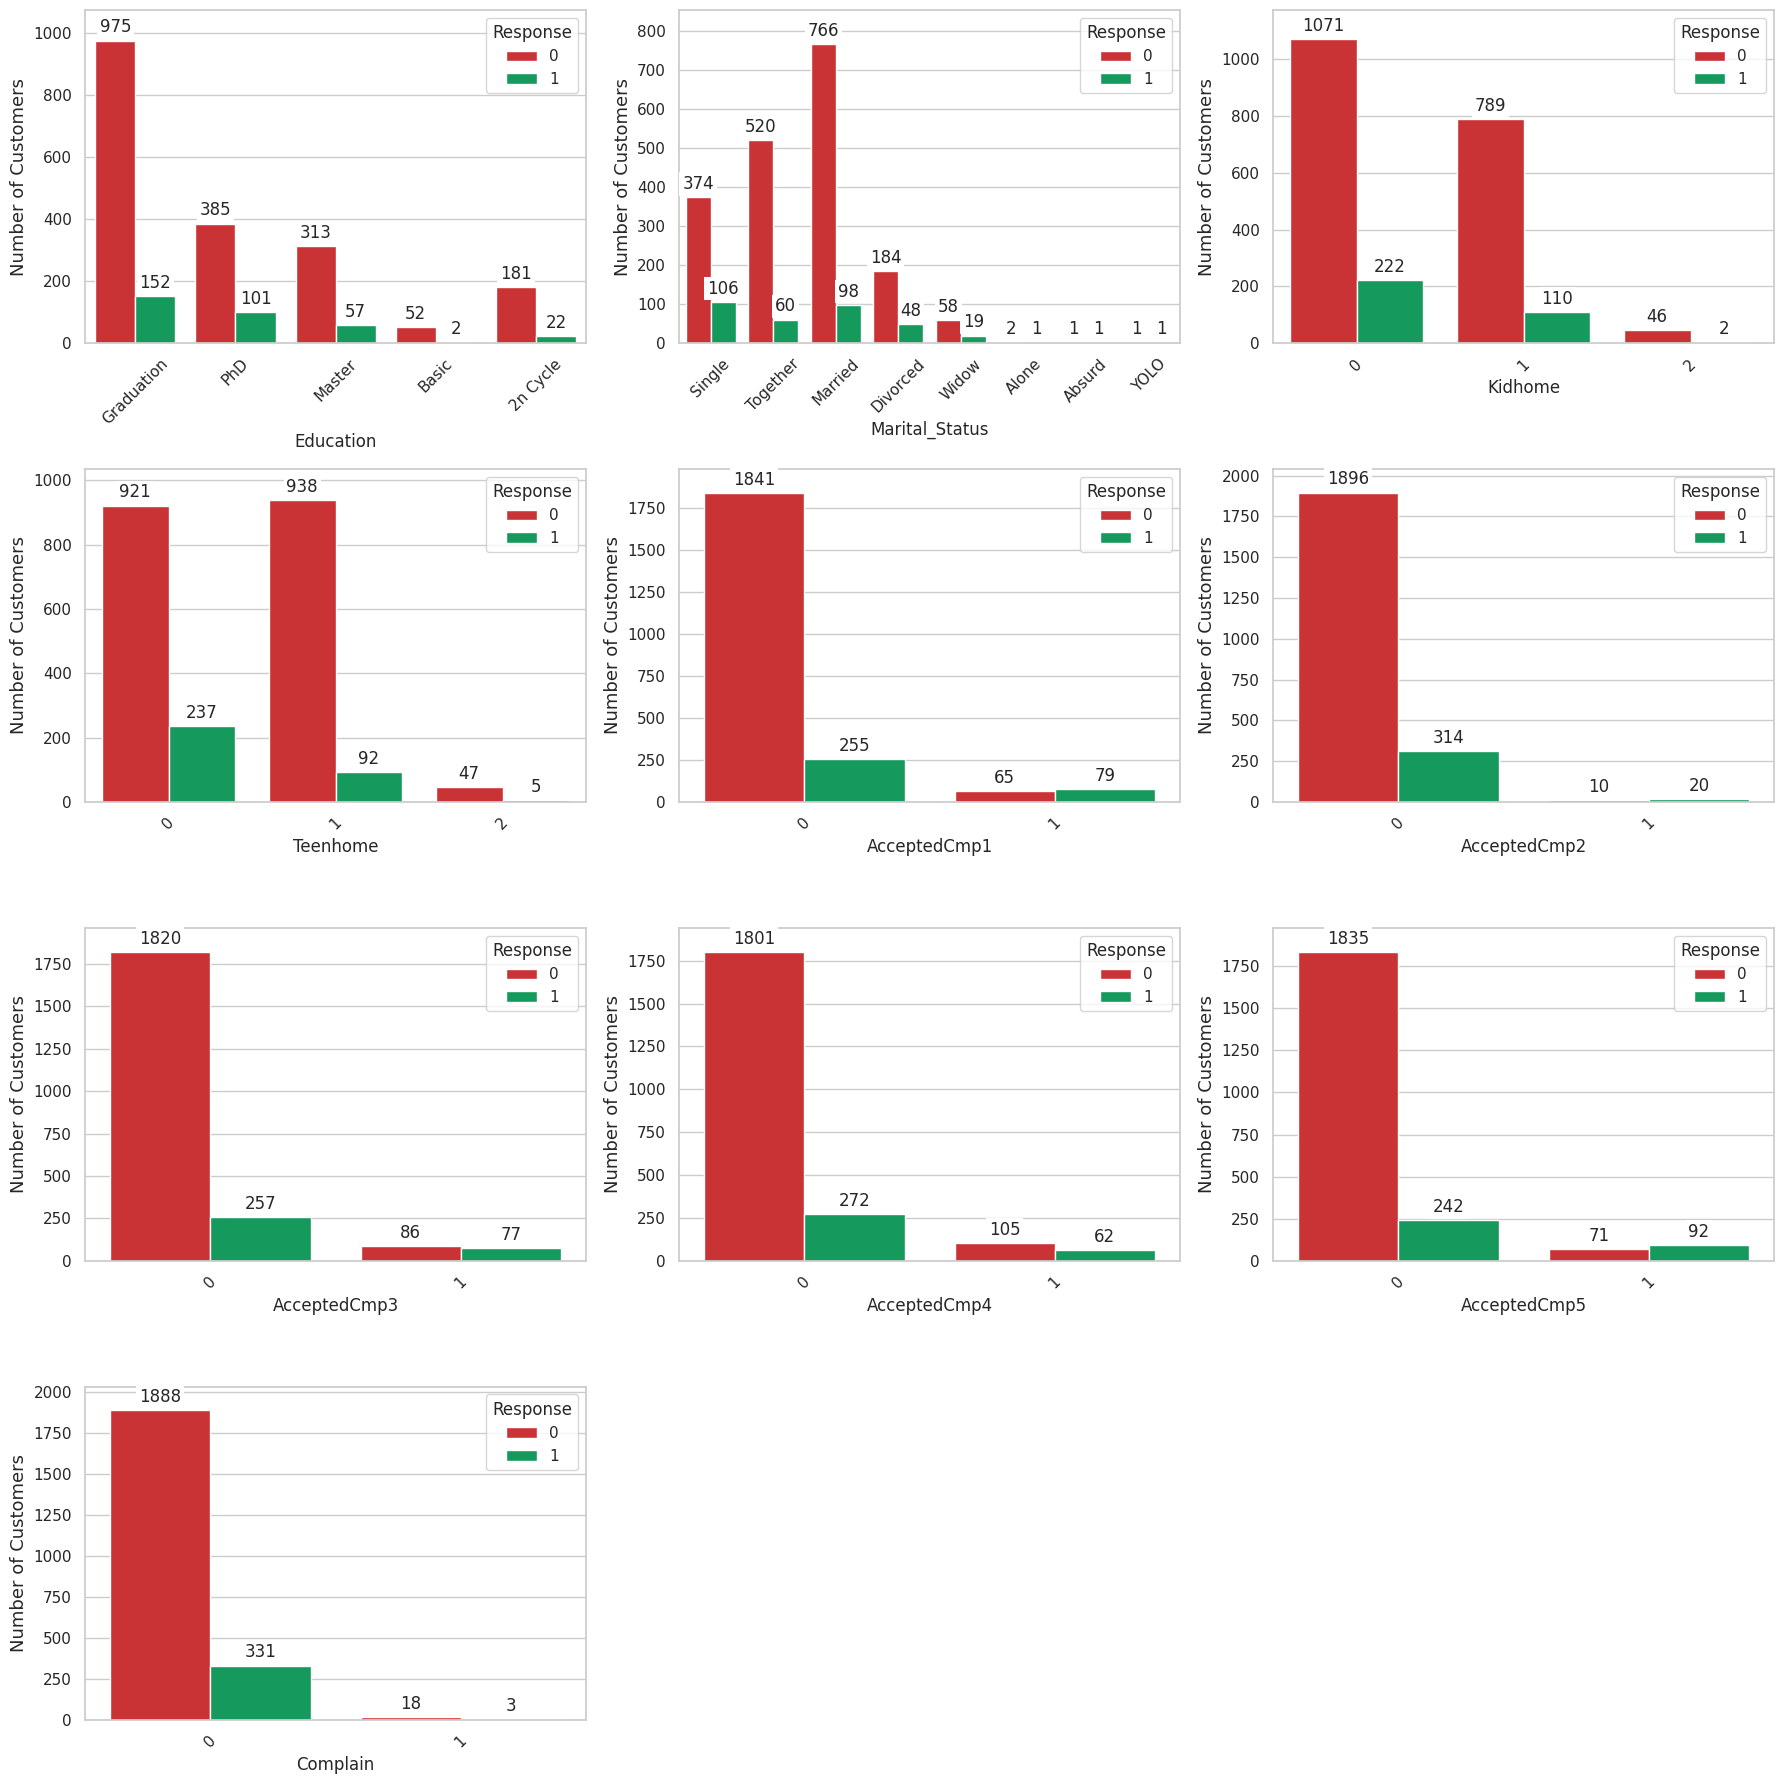

In [ ]:
# Vorbereitung der kategorialen Spalten für die Visualisierung
cat = cat_cols.copy()
cat.insert(3, "Kidhome")
cat.insert(4, "Teenhome")
cat.remove("ID")
cat.remove("Response")

# Festlegen der Farben für die Balkendiagramme
colors=["#e31a1c", "#00af5f"]

# Festlegen der Anzahl der Zeilen für Subplots
n=4
fig = plt.figure(figsize=(18, 18))

# Erstellen von Balkendiagrammen für jede kategoriale Variable
for i in range(0, len(cat)):
    fig.add_subplot(n, math.ceil(len(cat)/n), i+1)
    bar = sns.countplot(x=df[cat[i]], hue=df["Response"], palette=colors, orient='h')
    for i in bar.patches:
        bar.annotate(int(i.get_height()),
                xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom',
                bbox=dict(facecolor='white', edgecolor="None", pad=2))

    # Anpassungen für bessere Darstellung
    sns.color_palette("YlOrBr")
    plt.xticks(rotation=45)
    y_start, y_end = plt.ylim()
    plt.ylim(0, y_end+50)
    plt.ylabel('Number of Customers',fontsize=13)
    plt.tight_layout()